In [1]:
#imports
import pandas as pd
import numpy as np
import math as mat
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import tensorflow as tf

from tensorflow import keras

# Data Exploration


In [2]:
df = pd.read_csv('/content/raw_house_data.csv')
df.head(10)

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3,None,None,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",None
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",None
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55
5,21528016,3250000.0,85718,-110.910593,32.339090,1.67,27802.84,1999,3,4,6842,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Natural Stone, Wood, Other",422
6,21610478,2400000.0,85712,-110.883315,32.261069,2.10,19038.42,2001,9,8,12025,4,"Dishwasher, Garbage Disposal, Oven",6.0,"Carpet, Natural Stone, Wood, Other",0
7,21211741,2500000.0,85750,-110.861002,32.331603,1.07,21646.00,2011,6,8,8921,4,"Compactor, Dishwasher, Freezer, Garbage Dispos...",5.0,"Carpet, Natural Stone, Wood",220
8,21324646,3700000.0,85718,-110.912156,32.343601,6.73,25094.39,2002,5,7,5238,3,"Compactor, Dishwasher, Freezer, Garbage Dispos...",1.0,"Carpet, Natural Stone, Wood, Other",421
9,21812010,3250000.0,85750,-110.837950,32.327575,3.53,18936.11,2007,5,6,6480,3,"Dishwasher, Double Sink, Electric Range, Freez...",2.0,"Carpet, Concrete",141.67


MLS: code of the house
HOA: homeowners association
kitchen variable describes the contain of the products could be find

In [ ]:
df.isnull().sum()

MLS                  0
sold_price           0
zipcode              0
longitude            0
latitude             0
lot_acres           10
taxes                0
year_built           0
bedrooms             0
bathrooms            0
sqrt_ft              0
garage               0
kitchen_features     0
fireplaces          25
floor_covering       0
HOA                  0
dtype: int64

So, for this case we have 35 nan, where the 0 has a meaning and there still None that weren't count in other column.

In [ ]:
df.size

80000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff84f77bc50>,
      dtype=object)

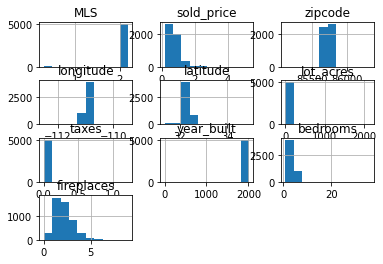

In [ ]:
df.hist()

We look for any kind of data distribution

In [ ]:
df.dtypes

MLS                   int64
sold_price          float64
zipcode               int64
longitude           float64
latitude            float64
lot_acres           float64
taxes               float64
year_built            int64
bedrooms              int64
bathrooms            object
sqrt_ft              object
garage               object
kitchen_features     object
fireplaces          float64
floor_covering       object
HOA                  object
dtype: object

It is proceed to change the type of the columns to int or float in order to work with them


In [3]:
data = df

In [4]:

data['garage'].replace('None', np.nan, inplace=True)
data['bathrooms'].replace('None', np.nan, inplace=True)
data['sqrt_ft'].replace('None', np.nan, inplace=True)
data['HOA'].replace('None', np.nan, inplace=True)
data['floor_covering'].replace('None', np.nan, inplace=True)
data['sold_price'].replace('None', np.nan, inplace=True)
data.head(10)

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3,NaN,NaN,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",NaN
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",NaN
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55
5,21528016,3250000.0,85718,-110.910593,32.339090,1.67,27802.84,1999,3,4,6842,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Natural Stone, Wood, Other",422
6,21610478,2400000.0,85712,-110.883315,32.261069,2.10,19038.42,2001,9,8,12025,4,"Dishwasher, Garbage Disposal, Oven",6.0,"Carpet, Natural Stone, Wood, Other",0
7,21211741,2500000.0,85750,-110.861002,32.331603,1.07,21646.00,2011,6,8,8921,4,"Compactor, Dishwasher, Freezer, Garbage Dispos...",5.0,"Carpet, Natural Stone, Wood",220
8,21324646,3700000.0,85718,-110.912156,32.343601,6.73,25094.39,2002,5,7,5238,3,"Compactor, Dishwasher, Freezer, Garbage Dispos...",1.0,"Carpet, Natural Stone, Wood, Other",421
9,21812010,3250000.0,85750,-110.837950,32.327575,3.53,18936.11,2007,5,6,6480,3,"Dishwasher, Double Sink, Electric Range, Freez...",2.0,"Carpet, Concrete",141.67


In [5]:
data.isna().sum()


MLS                   0
sold_price            0
zipcode               0
longitude             0
latitude              0
lot_acres            10
taxes                 0
year_built            0
bedrooms              0
bathrooms             6
sqrt_ft              56
garage                7
kitchen_features      0
fireplaces           25
floor_covering        1
HOA                 562
dtype: int64

Now, we know that the total of nans from the data are less than 30% of the total size, we could use some substitution for the missing data from HOA variable. The rest could be delete with dropna.



In [ ]:
data['bathrooms'].nunique()

19

In [ ]:
data['lot_acres'].isnull().sum()

10

In [ ]:
table = data['kitchen_features'].nunique()
table

1872

In [ ]:
for kitchen_features in data:
  print(df['kitchen_features'].unique())

['Dishwasher, Freezer, Refrigerator, Oven' 'Dishwasher, Garbage Disposal'
 'Dishwasher, Garbage Disposal, Refrigerator' ...
 'Dishwasher, Electric Range, Island, Refrigerator, Reverse Osmosis, Appliance Color: Stainless'
 'Dishwasher, Double Sink, Garbage Disposal, Gas Range, Pantry: Cabinet, Appliance Color: Stainless, Countertops: Granite slab, Microwave: Stainless over oven, Oven: wall'
 'Compactor, Dishwasher, Double Sink, Island, Appliance Color: Stainless']
['Dishwasher, Freezer, Refrigerator, Oven' 'Dishwasher, Garbage Disposal'
 'Dishwasher, Garbage Disposal, Refrigerator' ...
 'Dishwasher, Electric Range, Island, Refrigerator, Reverse Osmosis, Appliance Color: Stainless'
 'Dishwasher, Double Sink, Garbage Disposal, Gas Range, Pantry: Cabinet, Appliance Color: Stainless, Countertops: Granite slab, Microwave: Stainless over oven, Oven: wall'
 'Compactor, Dishwasher, Double Sink, Island, Appliance Color: Stainless']
['Dishwasher, Freezer, Refrigerator, Oven' 'Dishwasher, Garbage 

In [6]:
checkdata = data
checkdata["sqrt_ft"] = checkdata.sqrt_ft.astype(float)

We tried to change the types from the columns with a dictionary, but, we found some info like this '20,000' causing conflit to use that method, however, pandas.Series.astype give us result



In [7]:
checkdata.dtypes

MLS                   int64
sold_price          float64
zipcode               int64
longitude           float64
latitude            float64
lot_acres           float64
taxes               float64
year_built            int64
bedrooms              int64
bathrooms            object
sqrt_ft             float64
garage               object
kitchen_features     object
fireplaces          float64
floor_covering       object
HOA                  object
dtype: object

In [8]:
checkdata["bathrooms"] = checkdata.bathrooms.astype(float)
checkdata["garage"] = checkdata.garage.astype(float)

checkdata.dtypes

MLS                   int64
sold_price          float64
zipcode               int64
longitude           float64
latitude            float64
lot_acres           float64
taxes               float64
year_built            int64
bedrooms              int64
bathrooms           float64
sqrt_ft             float64
garage              float64
kitchen_features     object
fireplaces          float64
floor_covering       object
HOA                  object
dtype: object

In [9]:
checkdata['HOA'] = checkdata['HOA'].replace(',','', regex=True)
checkdata["HOA"] = checkdata.HOA.astype(float)
checkdata.dtypes

MLS                   int64
sold_price          float64
zipcode               int64
longitude           float64
latitude            float64
lot_acres           float64
taxes               float64
year_built            int64
bedrooms              int64
bathrooms           float64
sqrt_ft             float64
garage              float64
kitchen_features     object
fireplaces          float64
floor_covering       object
HOA                 float64
dtype: object

In [10]:
checkdata.isna().sum()

MLS                   0
sold_price            0
zipcode               0
longitude             0
latitude              0
lot_acres            10
taxes                 0
year_built            0
bedrooms              0
bathrooms             6
sqrt_ft              56
garage                7
kitchen_features      0
fireplaces           25
floor_covering        1
HOA                 562
dtype: int64

The HOA variable had int, float and objets in the same colunm, so, in order to deal with it, the ',' were replace by '' and now it could be apply the type as float.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8707d067d0>,
      dtype=object)

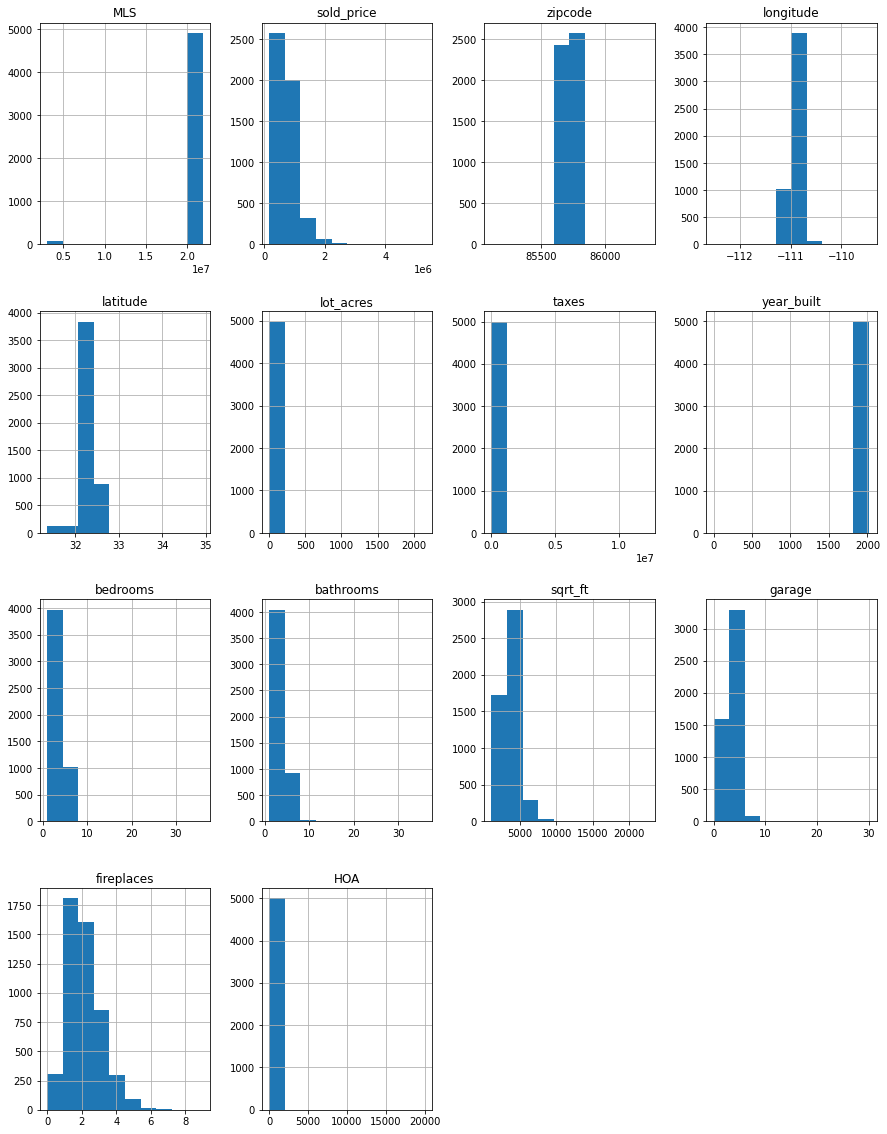

In [22]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
checkdata.hist(ax = ax)

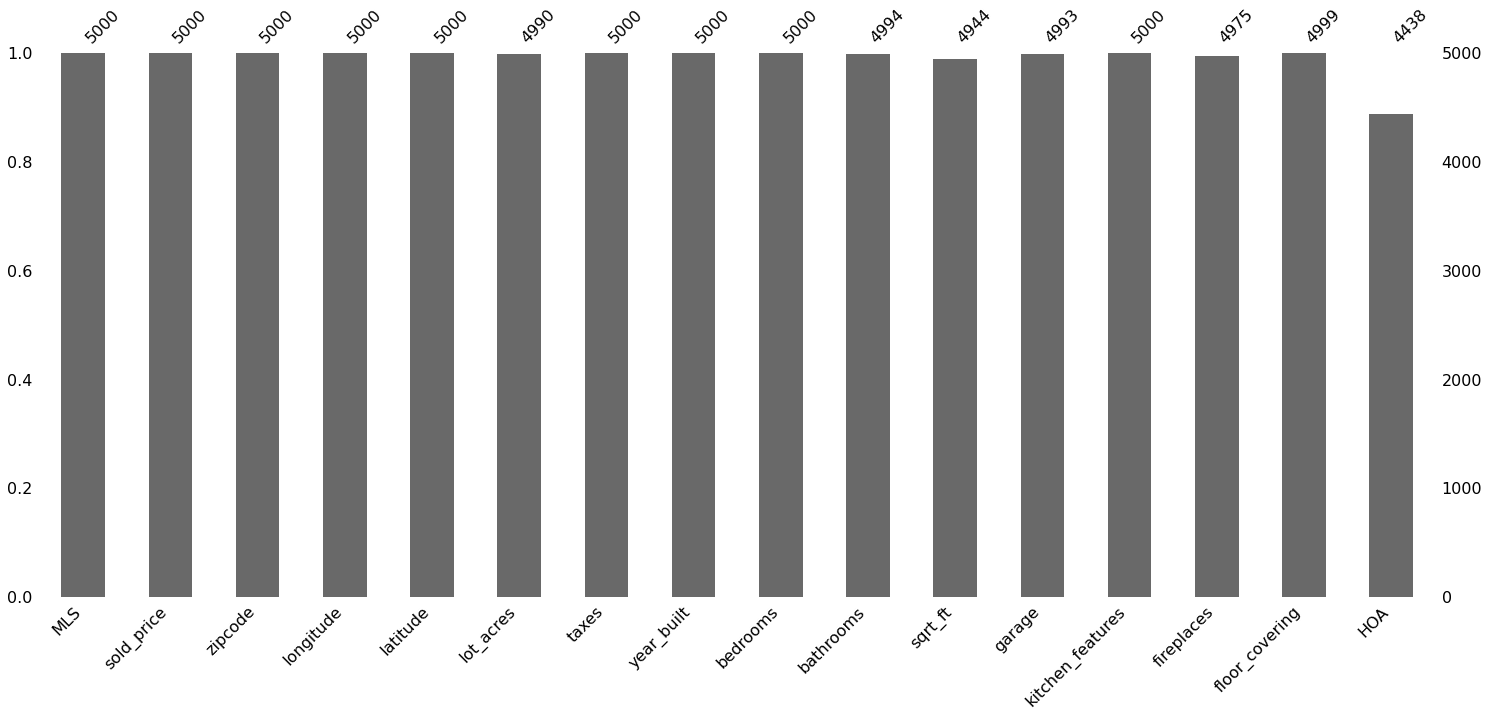

In [ ]:
msno.bar(checkdata)

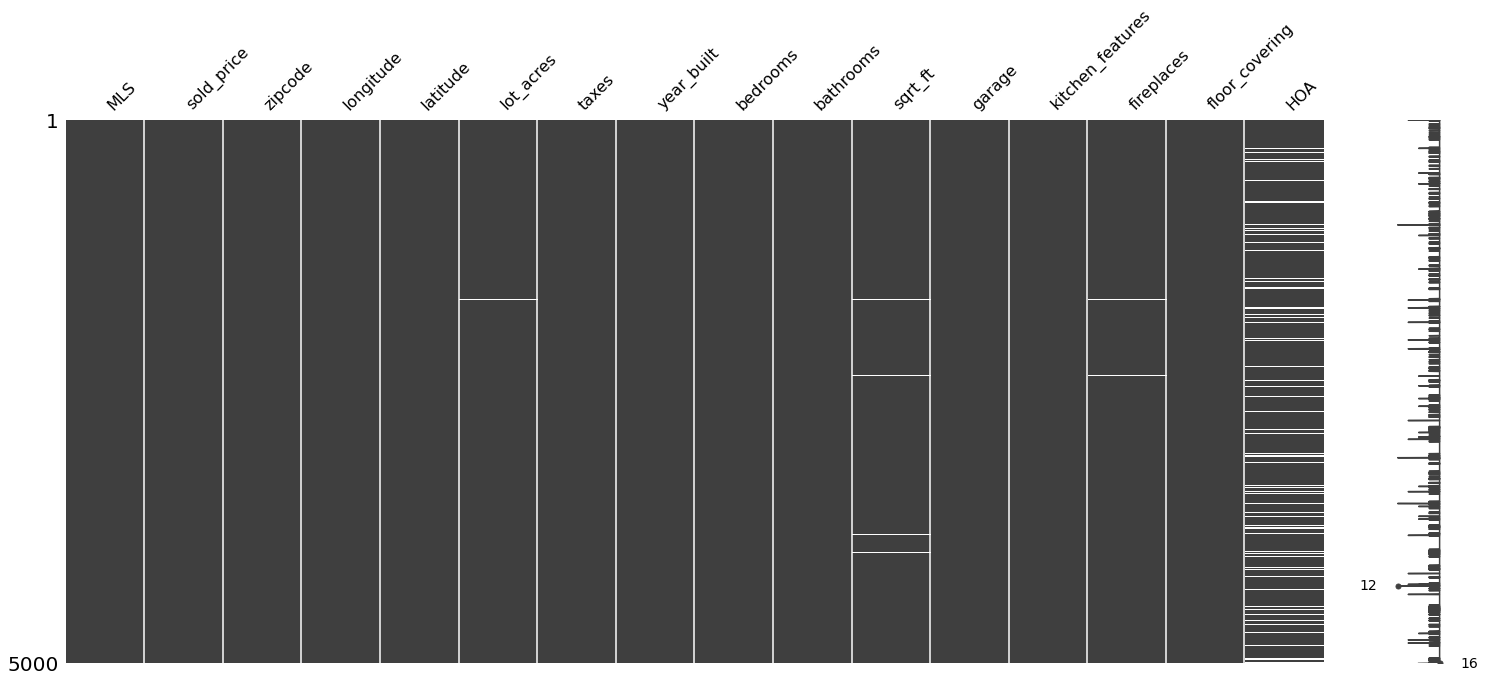

In [ ]:
msno.matrix(checkdata)

Image 1 and 2. Shows the cuantitive and places where is the missing data.

# Substitution 


It was choose, beacuase we had the data to do the model, is quick and simple.

In [11]:
checkdata.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


MLS           2.127070e+07
sold_price    7.746262e+05
zipcode       8.572303e+04
longitude    -1.109121e+02
latitude      3.230851e+01
lot_acres     4.661317e+00
taxes         9.402828e+03
year_built    1.992328e+03
bedrooms      3.933800e+00
bathrooms     3.829896e+00
sqrt_ft       3.716367e+03
garage        2.816143e+00
fireplaces    1.885226e+00
HOA           1.030431e+02
dtype: float64

In [13]:
checkdata.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


MLS           2.161469e+07
sold_price    6.750000e+05
zipcode       8.573700e+04
longitude    -1.109234e+02
latitude      3.231852e+01
lot_acres     9.900000e-01
taxes         6.223760e+03
year_built    1.999000e+03
bedrooms      4.000000e+00
bathrooms     4.000000e+00
sqrt_ft       3.512000e+03
garage        3.000000e+00
fireplaces    2.000000e+00
HOA           5.600000e+01
dtype: float64

We select mean, to substitude the nans in the variable with more nans


In [17]:
checkdata['HOA'] = checkdata['HOA'].fillna(checkdata['HOA'].mean())
checkdata.isna().sum()

MLS                  0
sold_price           0
zipcode              0
longitude            0
latitude             0
lot_acres           10
taxes                0
year_built           0
bedrooms             0
bathrooms            6
sqrt_ft             56
garage               7
kitchen_features     0
fireplaces          25
floor_covering       1
HOA                  0
dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87073acd10>,
      dtype=object)

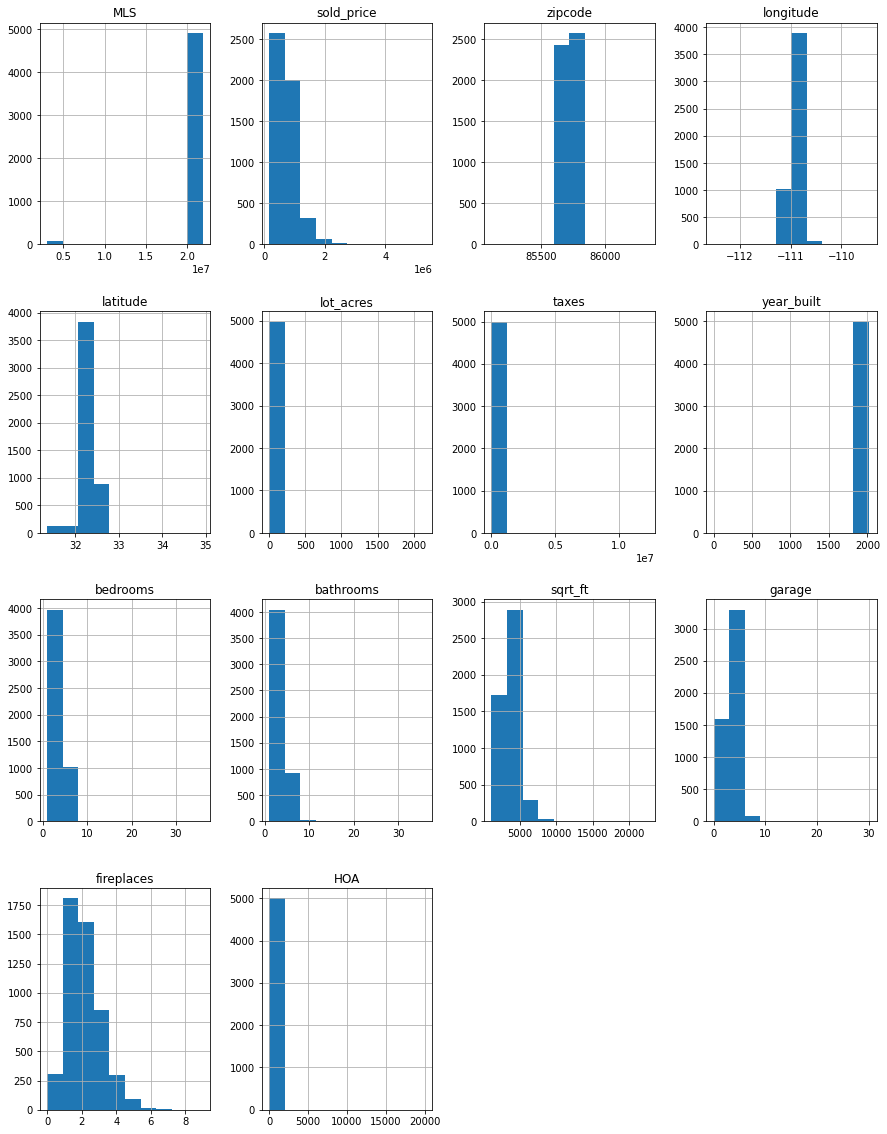

In [23]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
checkdata.hist(ax = ax)

Again, we check the distribution to see if the distribution show before change the nans were modify 

In [24]:
checkdata.dropna()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0.000000
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0.000000
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",103.043058
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55.000000
5,21528016,3250000.0,85718,-110.910593,32.339090,1.67,27802.84,1999,3,4.0,6842.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Natural Stone, Wood, Other",422.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,21909379,535000.0,85718,-110.922291,32.317496,0.18,4414.00,2002,3,2.0,2106.0,2.0,"Dishwasher, Double Sink, Electric Range, Garba...",1.0,Ceramic Tile,198.000000
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3.0,3601.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1.0,"Carpet, Ceramic Tile",103.043058
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3.0,2318.0,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1.0,"Carpet, Ceramic Tile",43.000000
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2.0,1772.0,0.0,"Dishwasher, Electric Range, Island, Refrigerat...",0.0,Ceramic Tile,103.043058


# Conclusions

At the end, we could use dropna for 100 nan from the rest of the dataframe. All the columns can be use in functions for predictions. 
The data exploration showed some 0 values, but they have a meaning.
If it require, a standarization could be done (depends which model will be use).

